In [ ]:
#Machine learning Assignment 2

In [ ]:
#Automobile Price Prediction

In [ ]:
#Use Machine learning to predict the price of a car based on several characteristics. The objective is to build a model to understand the factors that drive the car of the price. This will help your automobile company launch their new car in the market effectively by pricing it better.

In [ ]:
#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the dataset

In [2]:
data=pd.read_csv("AutoData (1).csv")

In [ ]:
#1. Perform EDA on the data

In [3]:
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 25)

In [5]:
data.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
#2. Perform data cleanup as required

In [8]:
CompanyName = data['make'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['make'],axis=1,inplace=True)

In [9]:
data.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [11]:
data['CompanyName'] = data['CompanyName'].str.capitalize()

In [12]:
data.CompanyName.unique()

array(['Alfa-romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Maxda', 'Mazda', 'Buick', 'Mercury',
       'Mitsubishi', 'Nissan', 'Peugeot', 'Plymouth', 'Porsche',
       'Porcshce', 'Renault', 'Saab', 'Subaru', 'Toyota', 'Toyouta',
       'Vokswagen', 'Volkswagen', 'Vw', 'Volvo'], dtype=object)

In [13]:
data.replace('Toyouta','Toyota')
data.replace('Vw','Volkswagen')
data.replace('Maxda','Mazda')
data.replace('Porcshce','Porshce')
data.replace('Vokswagen','Volkswagen')
#data.iloc[20:80,]

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,Alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,Alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,Alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,Audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,Audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,Volvo,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,Volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,Volvo,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,Volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
Duplicate=data[data.duplicated()]

In [15]:
Duplicate

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [ ]:
#Visualising the data

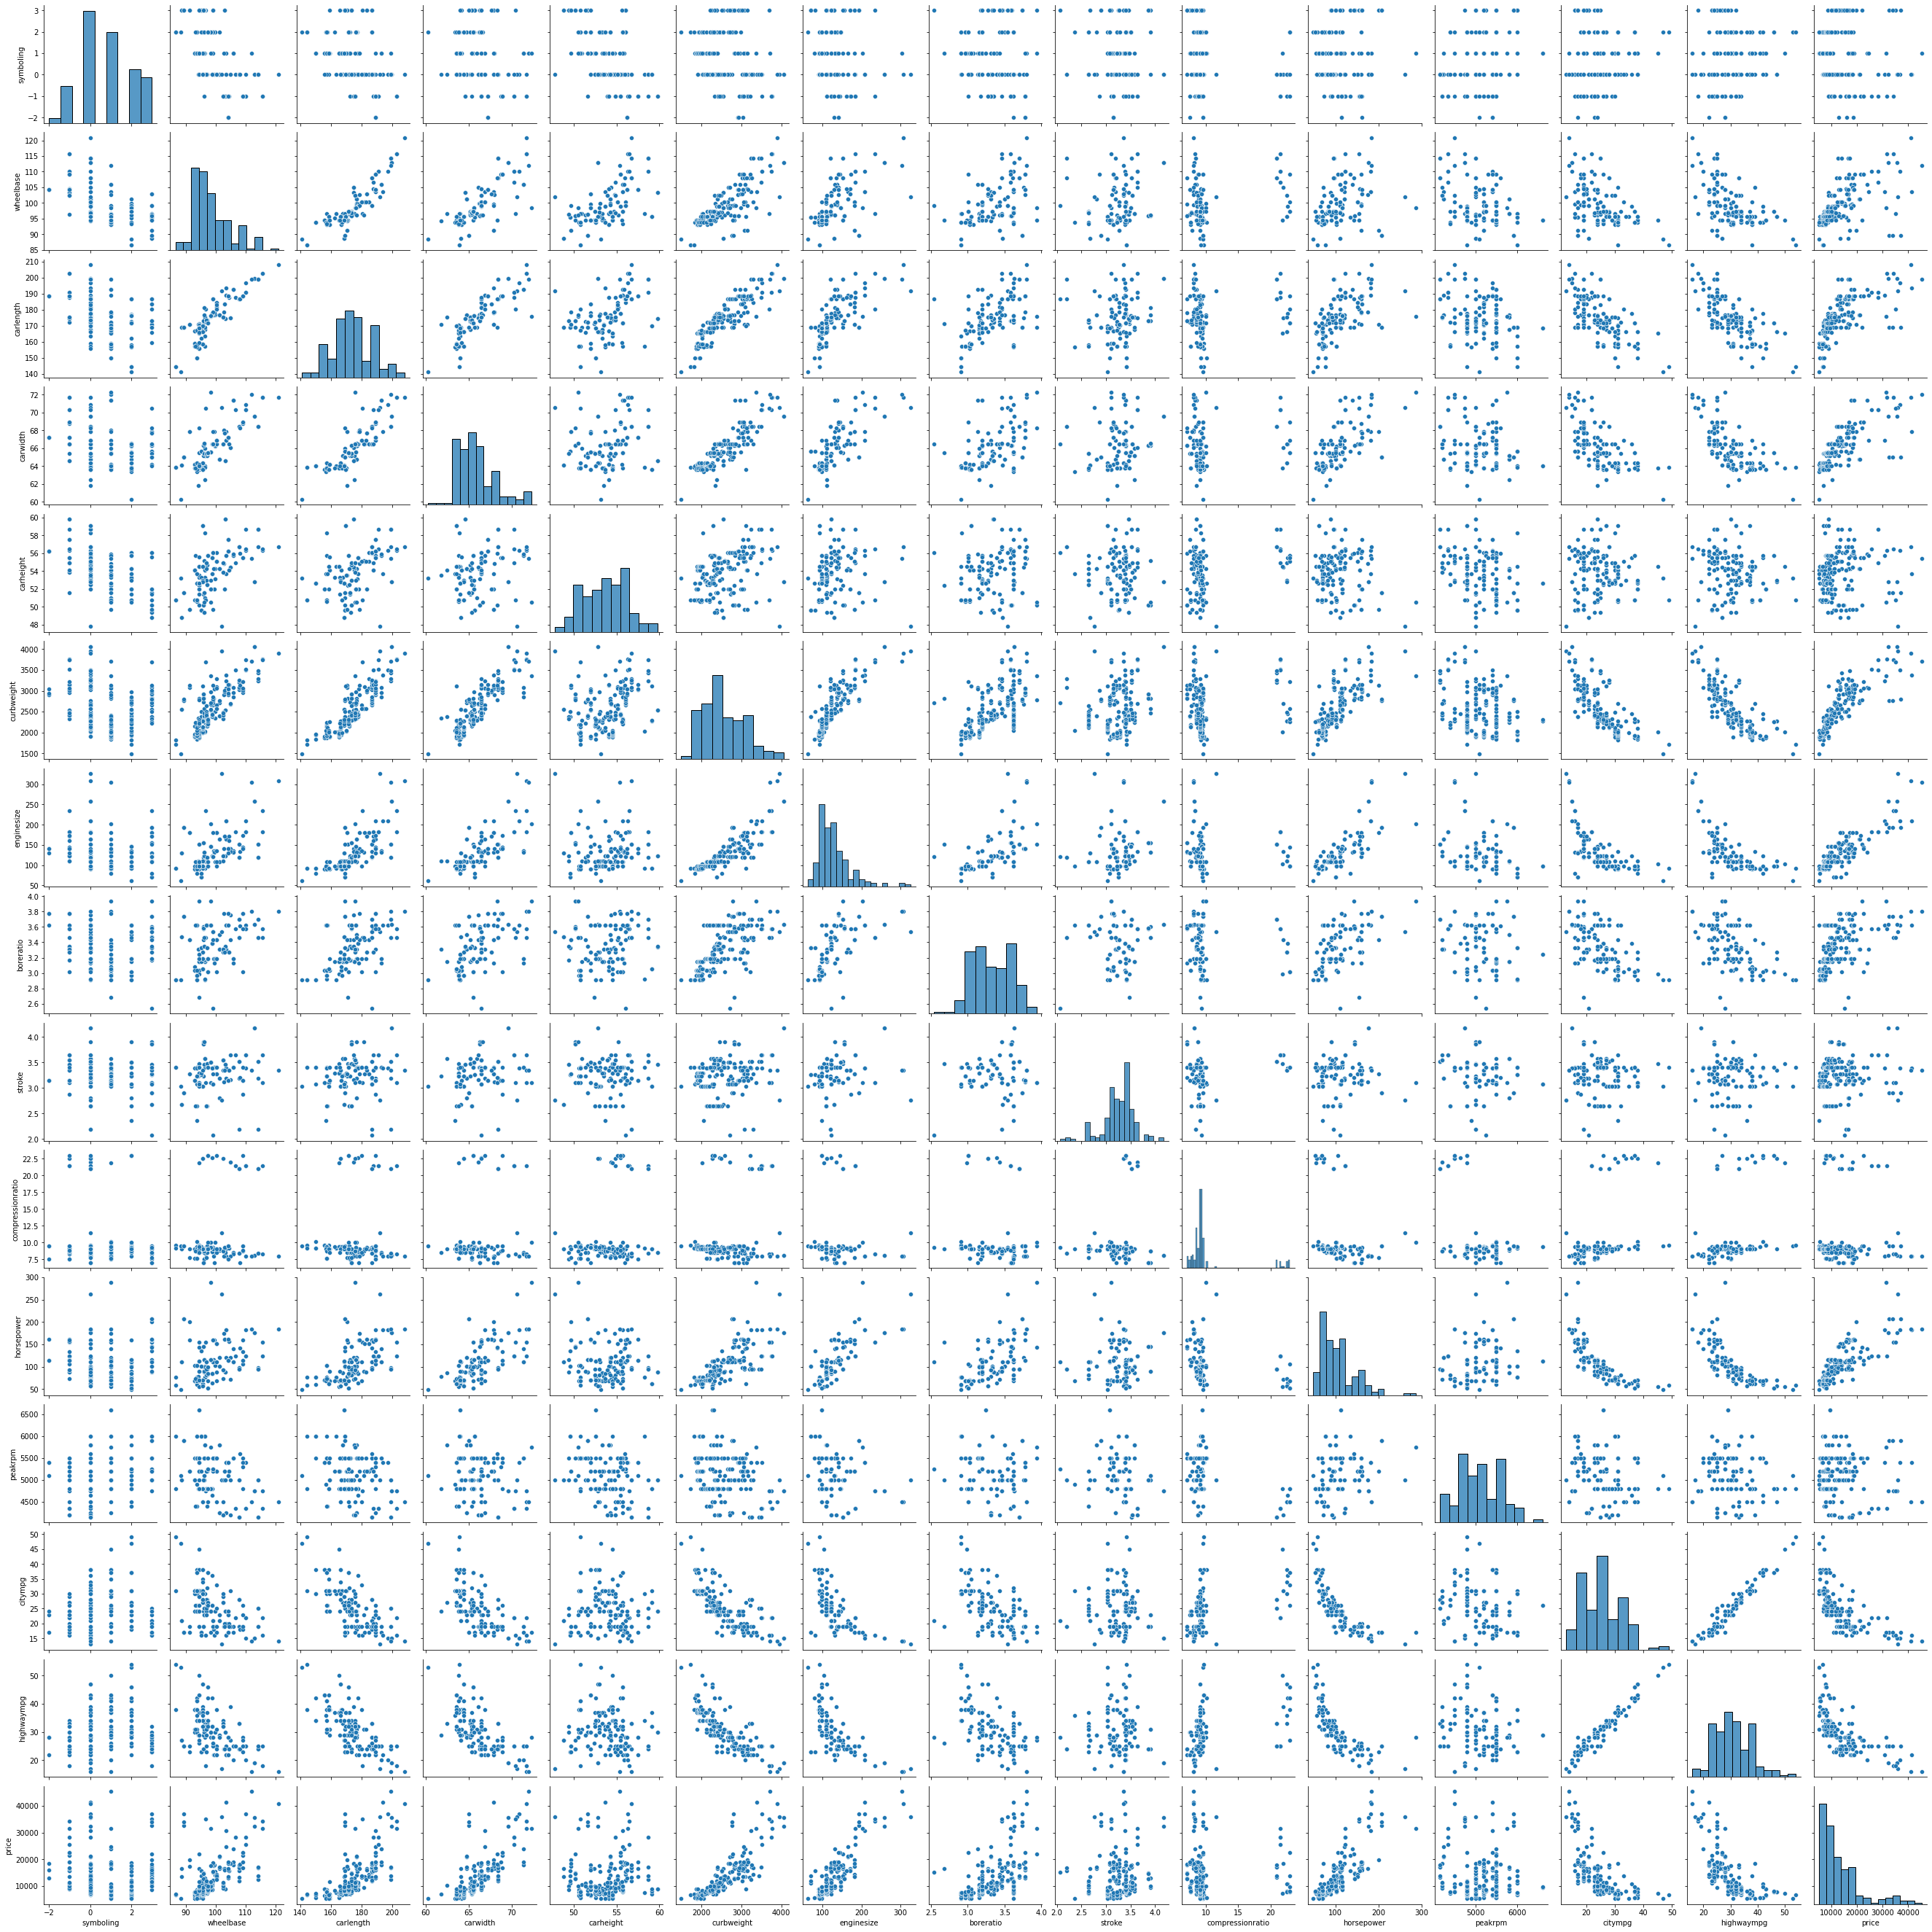

In [16]:
sns.pairplot(data)

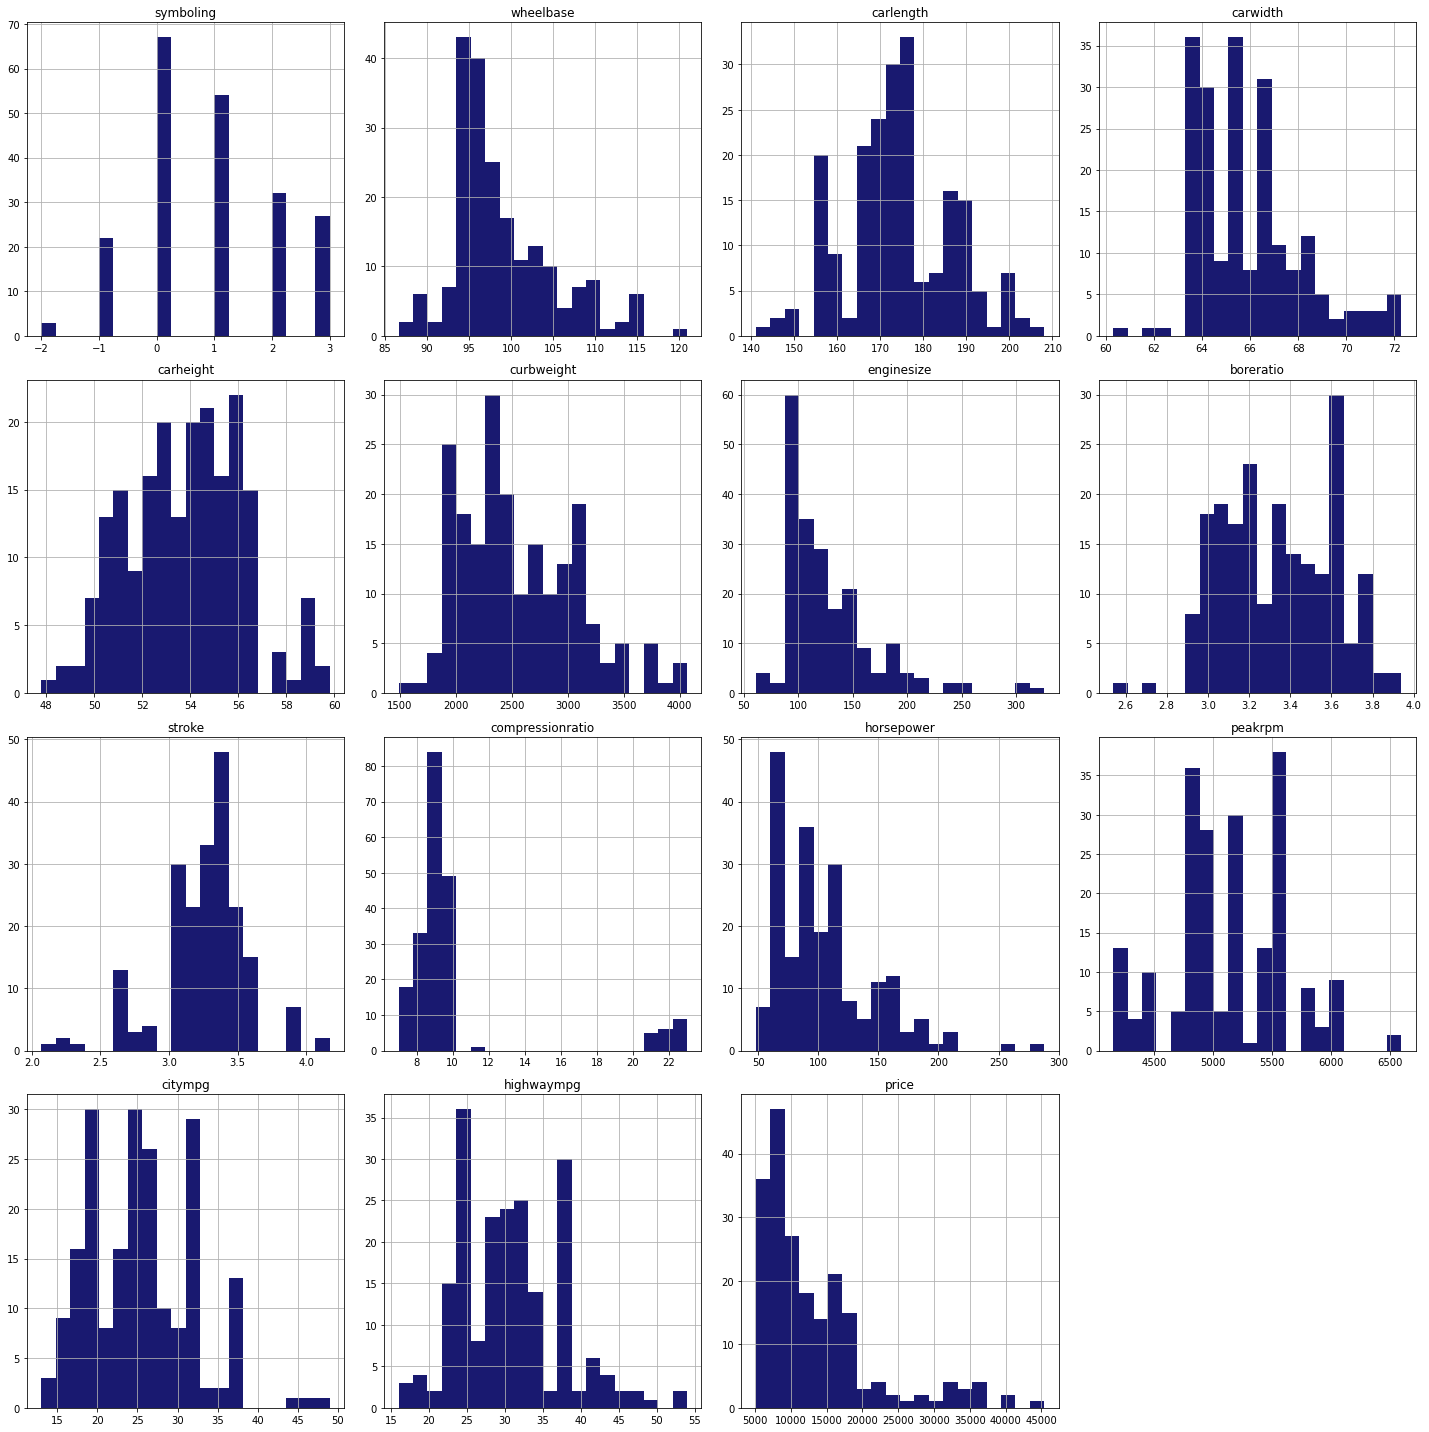

In [17]:
def draw_hist(dataframe,features,rows,columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,columns,i+1)
        dataframe[features].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+"Distribution",color='red')
    fig.tight_layout()
    plt.show()
draw_hist(data,data.columns,5,5)

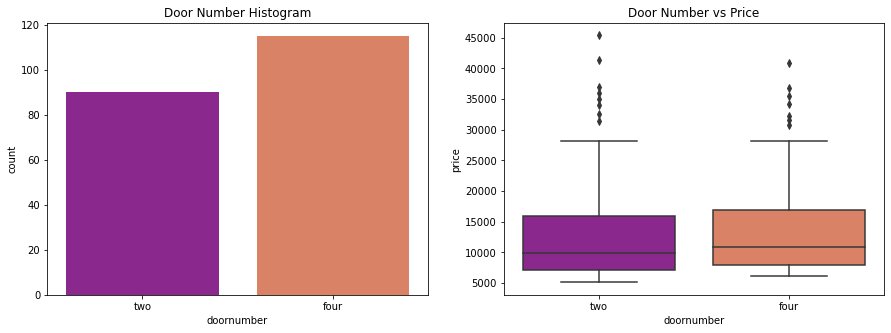

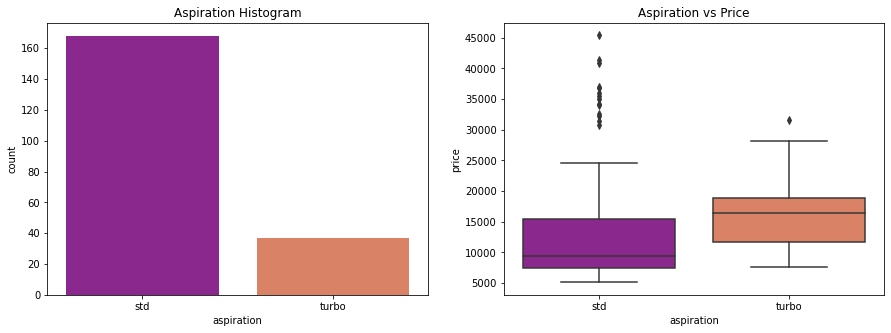

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(data.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=data.aspiration, y=data.price, palette=("plasma"))

plt.show()

In [ ]:
#Inference

#Doornumber variable is not effecting the price much. There is no significant difference between the categories in it. It seems like aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.

120.0

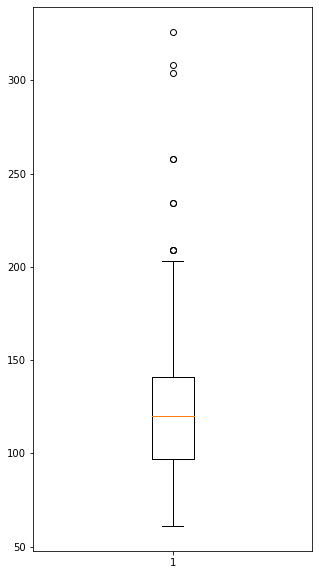

In [19]:
fig=plt.figure(figsize=(5,10))
plt.boxplot(data['enginesize'])
data['enginesize'].median()

In [ ]:
#Inference:

#The average Size of engine is approximately 120

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

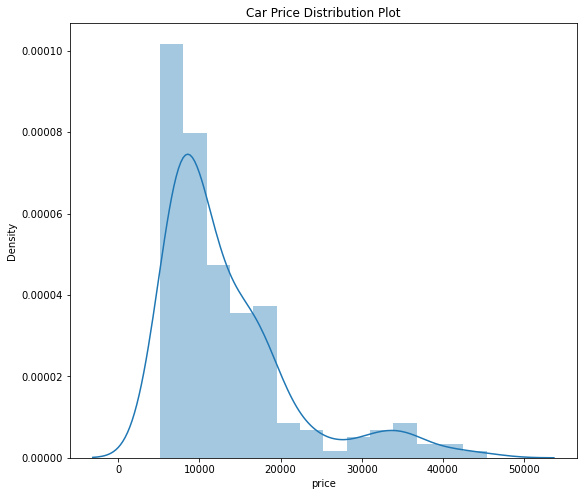

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

Text(0, 0.5, 'Price')

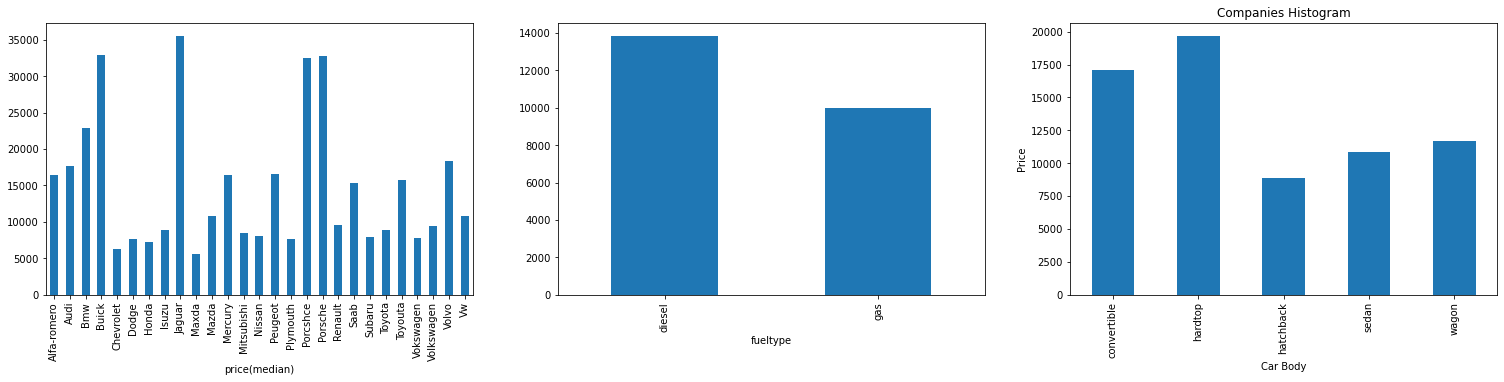

In [21]:
plt.figure(figsize=(26,5))

plt.subplot(1,3,1)
data.groupby(['CompanyName'])['price'].median().plot.bar()
plt.xlabel('price(median)')

plt.subplot(1,3,2)
data.groupby(['fueltype'])['price'].median().plot.bar()


plt.subplot(1,3,3)
data.groupby(['carbody'])['price'].median().plot.bar()
plt.title('Companies Histogram')
plt.xlabel('Car Body')
plt.ylabel('Price')

In [ ]:
#Inference

#Jaguar and Buick seem to have highest average price. diesel has higher average price than gas. hardtop and convertible have higher average price

In [22]:
data.groupby(['fueltype']).count()

,symboling,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
fueltype,,,,,,,,,,,,,,,,,,,,,
diesel,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
gas,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185


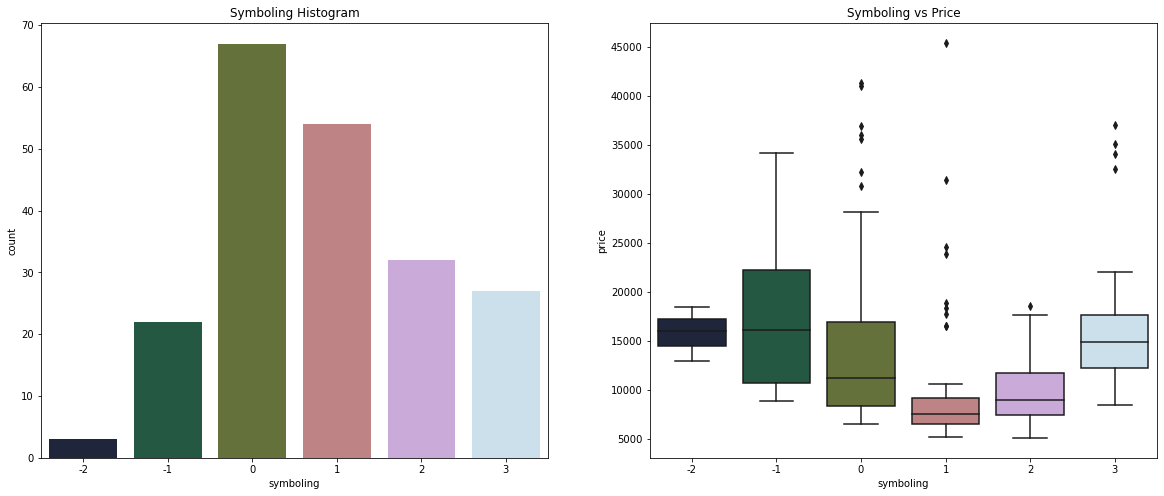

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(data.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=data.symboling, y=data.price, palette=("cubehelix"))

plt.show()

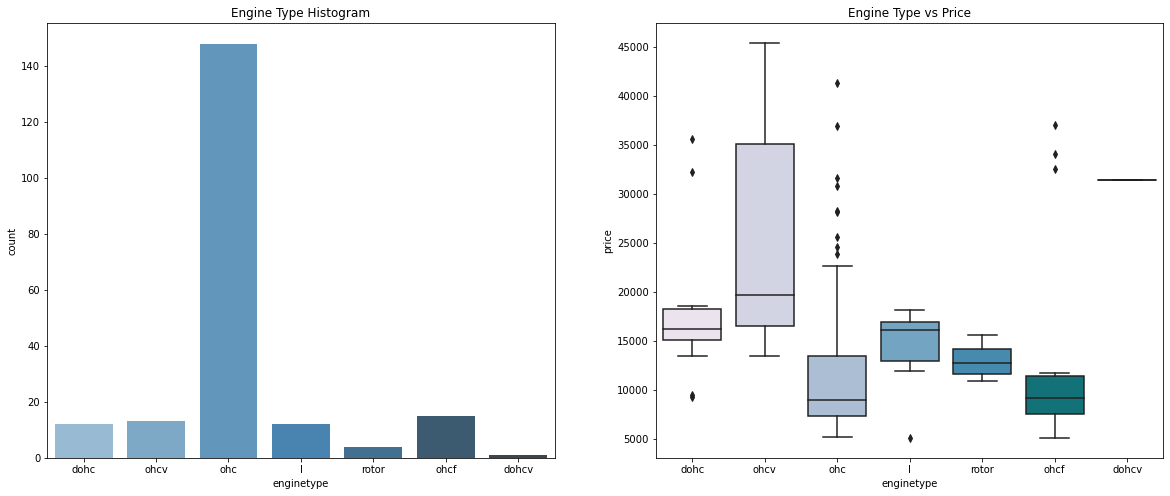

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=data.enginetype, y=data.price, palette=("PuBuGn"))

plt.show()

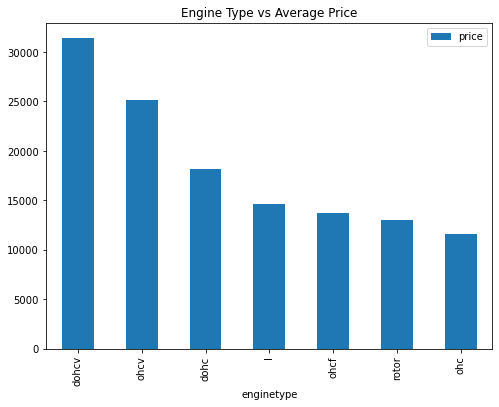

In [25]:
df = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

In [ ]:
#3.Pick the best variable for making a simple linear regression model

In [26]:
data['price'] = data['price'].astype('int')
temp = data.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
data['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
data.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,3,gas,Alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,3,gas,Alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,1,gas,Alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,2,gas,Audi,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,2,gas,Audi,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


In [27]:
cars_lr = data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize','carsrange', 'boreratio','horsepower', 'carlength','carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,carsrange,boreratio,horsepower,carlength,carwidth
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,Medium,3.47,111,168.8,64.1
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,Medium,3.47,111,168.8,64.1
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,Medium,2.68,154,171.2,65.5
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,Medium,3.19,102,176.6,66.2
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,Medium,3.19,115,176.6,66.4


In [28]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [29]:
cars_lr

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1,2952,141,3.78,114,188.8,68.9,1,0,...,0,0,0,1,0,0,0,0,1,0
201,19045,109.1,3049,141,3.78,160,188.8,68.8,1,1,...,0,0,0,1,0,0,0,0,1,0
202,21485,109.1,3012,173,3.58,134,188.8,68.9,1,0,...,1,0,0,0,1,0,0,0,1,0
203,22470,109.1,3217,145,3.01,106,188.8,68.9,0,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
#4. Perform train test split 

In [30]:
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(cars_lr, test_size=0.30, random_state=42)

In [31]:
df_train

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
177,11248,102.4,2458,122,3.31,92,175.6,66.5,1,0,...,0,0,0,1,0,0,0,0,0,0
75,16503,102.7,2910,140,3.78,175,178.4,68.0,1,1,...,0,0,0,1,0,0,0,0,1,0
174,10698,102.4,2480,110,3.27,73,175.6,66.5,0,1,...,0,0,0,1,0,0,0,0,0,0
31,6855,86.6,1819,92,2.91,76,144.6,63.9,1,0,...,0,0,0,1,0,0,0,0,0,0
12,20970,101.2,2710,164,3.31,121,176.8,64.8,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,18399,99.2,3139,181,3.43,160,178.5,67.9,1,0,...,1,0,0,0,1,0,0,0,1,0
14,24565,103.5,3055,164,3.31,121,189.0,66.9,1,0,...,0,0,0,0,1,0,0,0,0,1
92,6849,94.5,1938,97,3.15,69,165.3,63.8,1,0,...,0,0,0,1,0,0,0,0,1,0
179,15998,102.9,3016,171,3.27,161,183.5,67.7,1,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
df_test

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
15,30760,103.5,3230,209,3.62,182,189.0,66.9,1,0,...,0,0,0,0,1,0,0,0,0,1
9,17859,99.5,3053,131,3.13,160,178.2,67.9,1,1,...,0,0,1,0,0,0,0,0,1,0
100,9549,97.2,2302,120,3.33,97,173.4,65.2,1,0,...,0,0,0,1,0,0,0,0,1,0
132,11850,99.1,2658,121,3.54,110,186.6,66.5,1,0,...,0,0,0,1,0,0,0,0,1,0
68,28248,110.0,3750,183,3.58,123,190.9,70.3,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,11845,95.3,2380,70,3.33,101,169.0,65.7,1,0,...,0,1,0,0,0,0,0,1,1,0
128,37028,89.5,2800,194,3.74,207,168.9,65.0,1,0,...,0,0,0,0,1,0,0,0,0,1
76,5389,93.7,1918,92,2.97,68,157.3,64.4,1,0,...,0,0,0,1,0,0,0,0,0,0
144,9233,97.0,2385,108,3.62,82,172.0,65.4,1,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
177,0.152177,0.544828,0.284379,0.203125,0.550000,0.169492,0.534483,0.447619,1,0,...,0,0,0,1,0,0,0,0,0,0
75,0.282632,0.555172,0.485536,0.273438,0.885714,0.521186,0.582759,0.590476,1,1,...,0,0,0,1,0,0,0,0,1,0
174,0.138523,0.544828,0.294170,0.156250,0.521429,0.088983,0.534483,0.447619,0,1,...,0,0,0,1,0,0,0,0,0,0
31,0.043121,0.000000,0.000000,0.085938,0.264286,0.101695,0.000000,0.200000,1,0,...,0,0,0,1,0,0,0,0,0,0
12,0.393526,0.503448,0.396529,0.367188,0.550000,0.292373,0.555172,0.285714,1,0,...,0,0,0,0,1,0,0,0,0,1


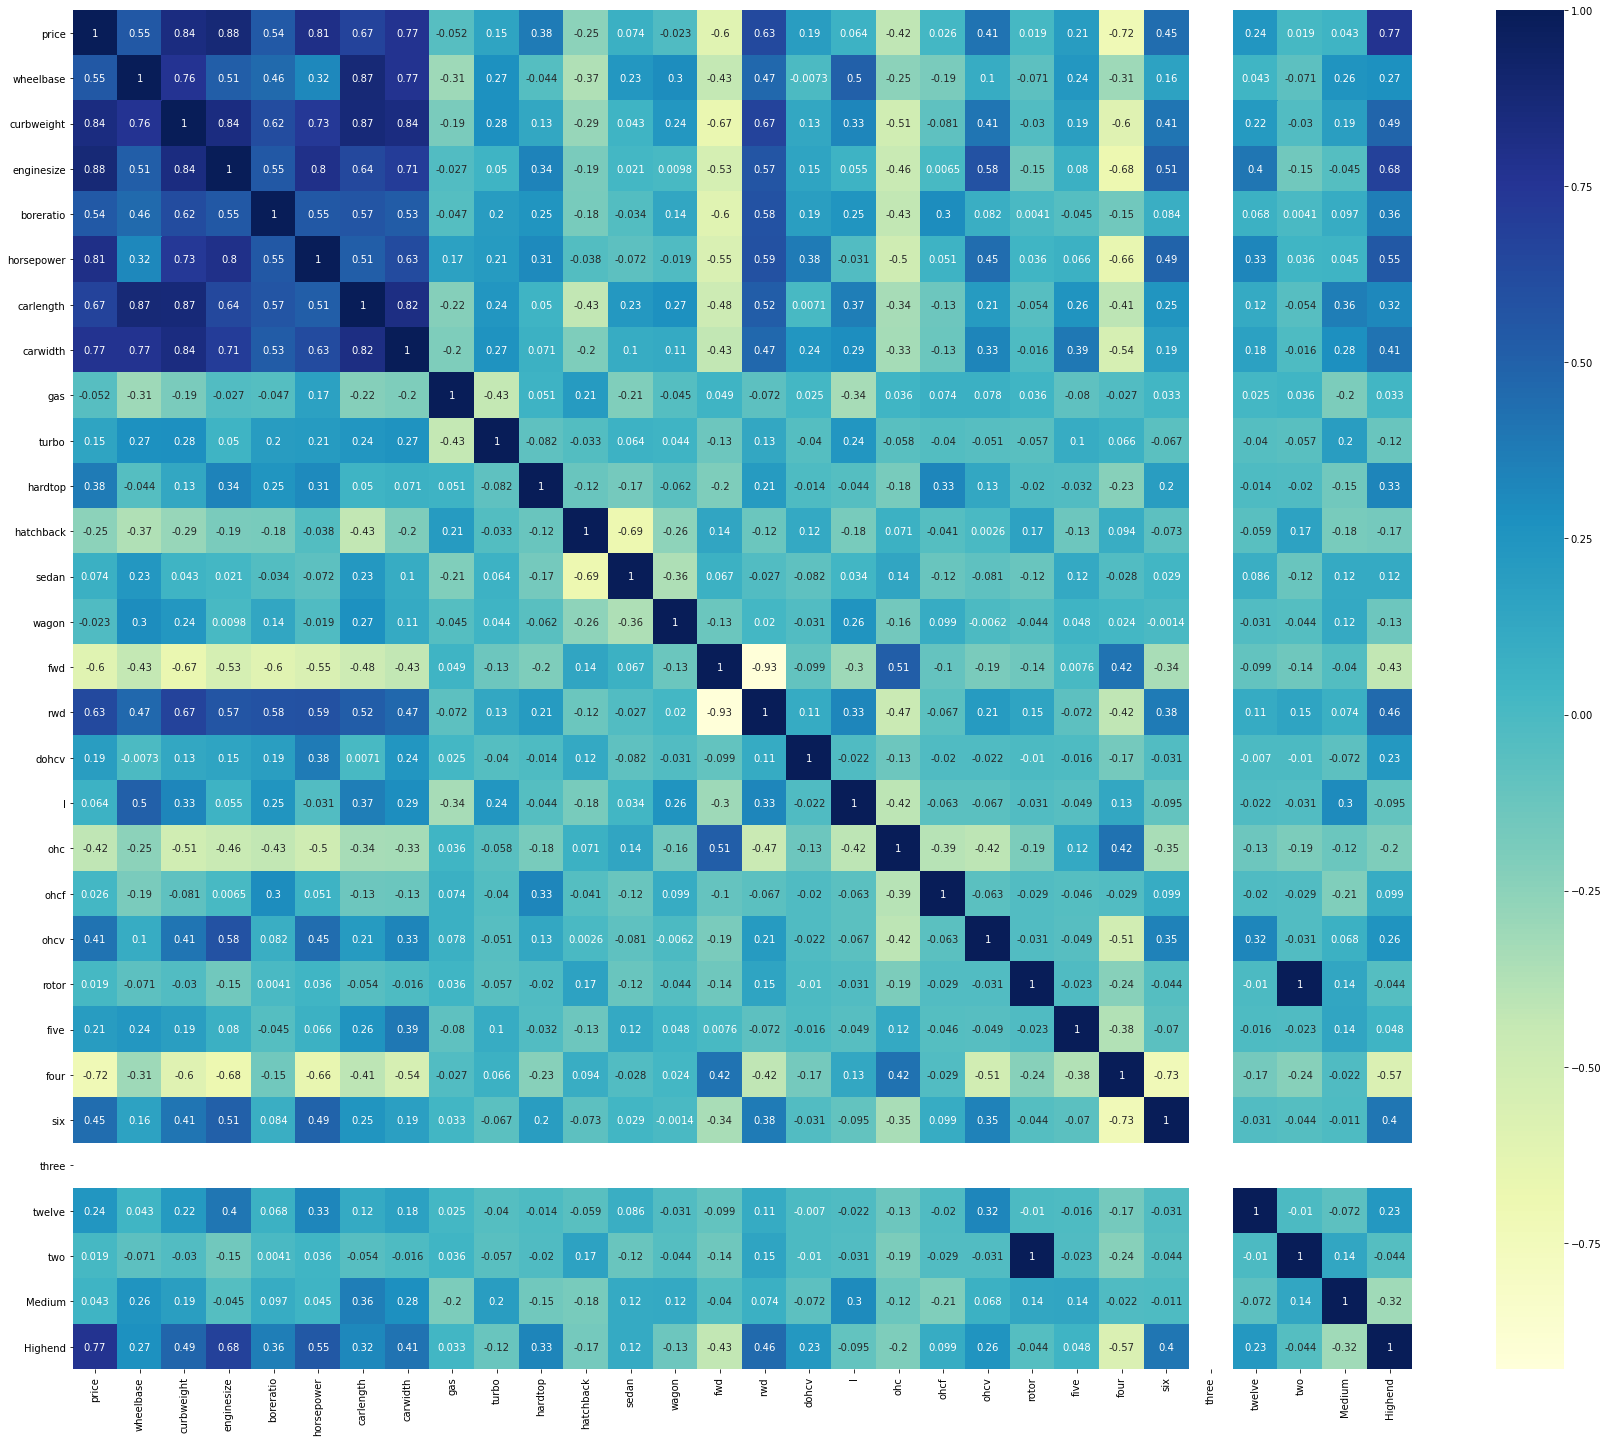

In [35]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [36]:
df_train.corr()
#to find correlation between variables and if both variables are positively increasing then the value is positive and versa.
# IF 0 no correlation between variables

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
price,1.000000,0.550373,0.838979,0.876752,0.543366,0.811183,0.673317,0.771034,-0.051623,0.149314,...,0.414799,0.018863,0.207304,-0.718040,0.449282,NaN,0.242838,0.018863,0.043432,0.772010
wheelbase,0.550373,1.000000,0.763689,0.513343,0.457695,0.315935,0.873137,0.770678,-0.306867,0.274822,...,0.102905,-0.071431,0.237441,-0.305537,0.163819,NaN,0.042565,-0.071431,0.257594,0.271988
curbweight,0.838979,0.763689,1.000000,0.841292,0.622881,0.732840,0.868949,0.838544,-0.185679,0.277829,...,0.408688,-0.029913,0.191014,-0.596265,0.411182,NaN,0.221953,-0.029913,0.190642,0.486810
enginesize,0.876752,0.513343,0.841292,1.000000,0.553012,0.799309,0.643460,0.710388,-0.027384,0.049602,...,0.579431,-0.150026,0.080147,-0.681753,0.507453,NaN,0.404407,-0.150026,-0.044808,0.678564
boreratio,0.543366,0.457695,0.622881,0.553012,1.000000,0.552224,0.570298,0.530869,-0.046774,0.203115,...,0.082228,0.004143,-0.045281,-0.150844,0.084433,NaN,0.067856,0.004143,0.097213,0.363091
horsepower,0.811183,0.315935,0.732840,0.799309,0.552224,1.000000,0.511526,0.625418,0.174653,0.212506,...,0.446021,0.036440,0.065815,-0.657875,0.489674,NaN,0.326259,0.036440,0.045138,0.551481
carlength,0.673317,0.873137,0.868949,0.643460,0.570298,0.511526,1.000000,0.821267,-0.224471,0.243677,...,0.213112,-0.054476,0.258717,-0.413421,0.253331,NaN,0.115689,-0.054476,0.361413,0.318166
carwidth,0.771034,0.770678,0.838544,0.710388,0.530869,0.625418,0.821267,1.000000,-0.204556,0.265461,...,0.333749,-0.015820,0.391426,-0.540921,0.185732,NaN,0.177971,-0.015820,0.277562,0.412304
gas,-0.051623,-0.306867,-0.185679,-0.027384,-0.046774,0.174653,-0.224471,-0.204556,1.000000,-0.433999,...,0.078438,0.036046,-0.079694,-0.027197,0.033243,NaN,0.025399,0.036046,-0.197922,0.033243
turbo,0.149314,0.274822,0.277829,0.049602,0.203115,0.212506,0.243677,0.265461,-0.433999,1.000000,...,-0.051454,-0.057459,0.102717,0.065572,-0.066792,NaN,-0.040486,-0.057459,0.198077,-0.122002


In [ ]:
#Inference:

#Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend

In [37]:
y_train = df_train.pop('price')
X_train = df_train

In [38]:
y_train.shape

(143,)

In [39]:
X_train.shape

(143, 29)

In [40]:
X_train

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
177,0.544828,0.284379,0.203125,0.550000,0.169492,0.534483,0.447619,1,0,0,...,0,0,0,1,0,0,0,0,0,0
75,0.555172,0.485536,0.273438,0.885714,0.521186,0.582759,0.590476,1,1,0,...,0,0,0,1,0,0,0,0,1,0
174,0.544828,0.294170,0.156250,0.521429,0.088983,0.534483,0.447619,0,1,0,...,0,0,0,1,0,0,0,0,0,0
31,0.000000,0.000000,0.085938,0.264286,0.101695,0.000000,0.200000,1,0,0,...,0,0,0,1,0,0,0,0,0,0
12,0.503448,0.396529,0.367188,0.550000,0.292373,0.555172,0.285714,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.434483,0.587450,0.433594,0.635714,0.457627,0.584483,0.580952,1,0,0,...,1,0,0,0,1,0,0,0,1,0
14,0.582759,0.550067,0.367188,0.550000,0.292373,0.765517,0.485714,1,0,0,...,0,0,0,0,1,0,0,0,0,1
92,0.272414,0.052960,0.105469,0.435714,0.072034,0.356897,0.190476,1,0,0,...,0,0,0,1,0,0,0,0,1,0
179,0.562069,0.532710,0.394531,0.521429,0.461864,0.670690,0.561905,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#5.Build model using best variable and report the R2

In [41]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import cross_val_score
from statsmodels.stats. outliers_influence import variance_inflation_factor

In [42]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
val=cross_val_score(lr,X_train,y_train,cv=5)
print(np.mean(val))

0.8738901819968772


In [44]:
rfe=RFE(lr,10)

In [45]:
rfe=rfe.fit(X_train,y_train)

In [46]:
X_train_rfe=X_train.columns[rfe.support_]

In [47]:
list(zip(rfe.ranking_,X_train.columns,rfe.support_))

[(8, 'wheelbase', False),
 (1, 'curbweight', True),
 (14, 'enginesize', False),
 (1, 'boreratio', True),
 (1, 'horsepower', True),
 (10, 'carlength', False),
 (1, 'carwidth', True),
 (18, 'gas', False),
 (15, 'turbo', False),
 (2, 'hardtop', False),
 (1, 'hatchback', True),
 (1, 'sedan', True),
 (1, 'wagon', True),
 (19, 'fwd', False),
 (16, 'rwd', False),
 (1, 'dohcv', True),
 (7, 'l', False),
 (17, 'ohc', False),
 (9, 'ohcf', False),
 (6, 'ohcv', False),
 (11, 'rotor', False),
 (5, 'five', False),
 (4, 'four', False),
 (3, 'six', False),
 (20, 'three', False),
 (1, 'twelve', True),
 (13, 'two', False),
 (12, 'Medium', False),
 (1, 'Highend', True)]

In [48]:
import statsmodels.api as sm

In [49]:
X_train_sm = sm.add_constant(X_train)

X_train_sm.head()

,const,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
177,1.0,0.544828,0.284379,0.203125,0.550000,0.169492,0.534483,0.447619,1,0,...,0,0,0,1,0,0,0,0,0,0
75,1.0,0.555172,0.485536,0.273438,0.885714,0.521186,0.582759,0.590476,1,1,...,0,0,0,1,0,0,0,0,1,0
174,1.0,0.544828,0.294170,0.156250,0.521429,0.088983,0.534483,0.447619,0,1,...,0,0,0,1,0,0,0,0,0,0
31,1.0,0.000000,0.000000,0.085938,0.264286,0.101695,0.000000,0.200000,1,0,...,0,0,0,1,0,0,0,0,0,0
12,1.0,0.503448,0.396529,0.367188,0.550000,0.292373,0.555172,0.285714,1,0,...,0,0,0,0,1,0,0,0,0,1


In [50]:
LR1 = sm.OLS(endog=y_train,exog= X_train_sm).fit()

In [51]:
LR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     112.3
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           3.35e-70
Time:                        01:23:41   Log-Likelihood:                 268.33
No. Observations:                 143   AIC:                            -480.7
Df Residuals:                     115   BIC:                            -397.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1702      0.069      2.459      0.015       0.033       0.307
wheelbase      0.0514      0.051      1.013      0.313      -0.049       0.152
curbweight     0.2922      0.086      3.399      0.001       0.122       0.463
enginesize     0.0527      0.113      0.467      0.641      -0.171       0.276
boreratio     -0.1070      0.044     -2.452      0.016      -0.193      -0.021
horsepower     0.2877      0.083      3.452      0.001       0.123       0.453
carlength     -0.0650      0.061     -1.070      0.287      -0.185       0.055
carwidth       0.1849      0.054      3.429      0.001       0.078       0.292
gas           -0.0014      0.021     -0.065      0.948      -0.044       0.041
turbo          0.0125      0.016      0.797      0.427      -0.019       0.044
hardtop        0.0641      0.037      1.726      0.087      -0.009       0.138
hatchback     -0.0836      0.026     -3.230      0.002      -0.135      -0.032
sedan         -0.0715      0.027     -2.646      0.009      -0.125      -0.018
wagon         -0.1007      0.030     -3.369      0.001      -0.160      -0.041
fwd            0.0013      0.028      0.045      0.964      -0.055       0.057
rwd            0.0096      0.030      0.321      0.749      -0.049       0.069
dohcv         -0.2376      0.084     -2.842      0.005      -0.403      -0.072
l             -0.0479      0.028     -1.729      0.086      -0.103       0.007
ohc            0.0065      0.018      0.369      0.713      -0.028       0.041
ohcf           0.0462      0.030      1.562      0.121      -0.012       0.105
ohcv          -0.0643      0.028     -2.266      0.025      -0.121      -0.008
rotor         -0.0264      0.040     -0.656      0.513      -0.106       0.053
five          -0.1047      0.058     -1.820      0.071      -0.219       0.009
four          -0.1187      0.064     -1.861      0.065      -0.245       0.008
six           -0.1187      0.048     -2.489      0.014      -0.213      -0.024
three       1.647e-17   1.34e-17      1.230      0.221   -1.01e-17     4.3e-17
twelve        -0.1298      0.068     -1.910      0.059      -0.264       0.005
two           -0.0264      0.040     -0.656      0.513      -0.106       0.053
Medium         0.0355      0.010      3.391      0.001       0.015       0.056
Highend        0.2150      0.020     10.834      0.000       0.176       0.254
==============================================================================
Omnibus:                        9.683   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               22.136
Skew:                          -0.014   Prob(JB):                     1.56e-05
Kurtosis:                       4.927   Cond. No.                     1.12e+16
==============================================================================

N

In [ ]:
#Notes:
#[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
#[2] The smallest eigenvalue is 6.04e-30. This might indicate that there are
#strong multicollinearity problems or that the design matrix is singular. 

In [52]:
def model(X,y):
    X = sm.add_constant(X_train[X])
    LR1 = sm.OLS(endog=y,exog= X).fit()
    print(LR1.summary()) 
    return X
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
#6.Make a multiple regression model

In [ ]:
#Model1

In [53]:
X_train_new = model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     258.7
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           1.45e-81
Time:                        01:23:49   Log-Likelihood:                 248.05
No. Observations:                 143   AIC:                            -474.1
Df Residuals:                     132   BIC:                            -441.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0873      0.022      4.000      0.0

In [ ]:
#Notes:
#[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

#Inference:

#p-value of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables


In [54]:
X_train_new = X_train_rfe.drop(["twelve"])

In [55]:
X_train_new

Index(['curbweight', 'boreratio', 'horsepower', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'Highend'],
      dtype='object')

In [ ]:
#Model2

In [56]:
X_train_new = model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     281.2
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           5.32e-82
Time:                        01:24:00   Log-Likelihood:                 246.04
No. Observations:                 143   AIC:                            -472.1
Df Residuals:                     133   BIC:                            -442.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0921      0.022      4.206      0.0

In [ ]:
#Notes:
#[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [57]:
checkVIF(X_train_new)

,Features,VIF
0,const,34.00
1,curbweight,6.76
6,sedan,5.24
5,hatchback,4.99
4,carwidth,3.89
3,horsepower,3.37
7,wagon,3.15
2,boreratio,1.75
9,Highend,1.63
8,dohcv,1.39


In [58]:
X_train_new = X_train_rfe.drop(["curbweight"])
X_train_new = model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     244.9
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           3.13e-78
Time:                        01:24:09   Log-Likelihood:                 236.68
No. Observations:                 143   AIC:                            -453.4
Df Residuals:                     133   BIC:                            -423.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0685      0.023      2.959      0.0

,Features,VIF
0,const,33.33
5,sedan,5.36
4,hatchback,5.01
6,wagon,3.03
2,horsepower,2.77
3,carwidth,2.00
1,boreratio,1.69
9,Highend,1.60
7,dohcv,1.25
8,twelve,1.21


In [ ]:
#Notes:
#1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [ ]:
#Model3

In [59]:
X_train_new = X_train_rfe.drop(["sedan"])
X_train_new = model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     212.5
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           2.12e-74
Time:                        01:24:14   Log-Likelihood:                 227.16
No. Observations:                 143   AIC:                            -434.3
Df Residuals:                     133   BIC:                            -404.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0265      0.016     -1.685      0.0

In [ ]:
#Notes:
#[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [60]:
checkVIF(X_train_new)

,Features,VIF
0,const,13.51
1,curbweight,6.77
4,carwidth,3.77
3,horsepower,3.53
2,boreratio,1.74
9,Highend,1.61
7,dohcv,1.41
6,wagon,1.31
5,hatchback,1.24
8,twelve,1.18


In [ ]:
#a. Apply feature selection approaches

In [61]:
lr = sm.OLS(y_train,X_train_new).fit()
y_train_price = lr.predict(X_train_new)

Text(0.5, 0, 'Errors')

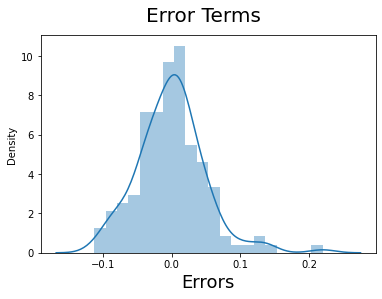

In [62]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [ ]:
#Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

In [ ]:
#7.Final model should be interpretable

In [ ]:
#a.What is your understanding of the factors that drive price?

#Prediction and Evaluation

In [63]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [64]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [65]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [66]:
# Making predictions
y_pred = lr.predict(X_test_new)

In [ ]:
#Model Accuracy Score

In [67]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8008024390123089

Text(0, 0.5, 'y_pred')

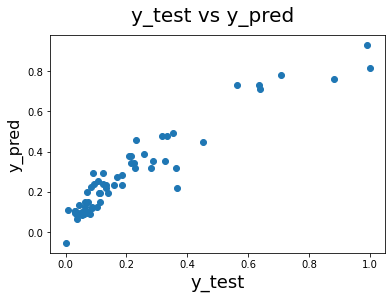

In [68]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [ ]:
#Model Evaluation

In [69]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     212.5
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           2.12e-74
Time:                        01:25:04   Log-Likelihood:                 227.16
No. Observations:                 143   AIC:                            -434.3
Df Residuals:                     133   BIC:                            -404.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0265      0.016     -1.685      0.0

In [ ]:
#Final Insights
# * R-sqaured and Adjusted R-squared (extent of fit) 0.935 and 0.931 explained
# * F-stats and Prob(F-stats) (overall model fit) 212.5 and 2.12e-74 -Model fir is significant and explained 93% variance is just not by chance.
# * p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.